In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join("data", "city_data.csv")
ride_data_to_load = os.path.join("data", "ride_data.csv")

# Reading the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combining the data into a single dataset
pyber_df_merged = pd.merge(ride_data, city_data, on = "city", how = "left")

# Displaying the data table for preview and renaming columns
pyber_df = pyber_df_merged.rename(columns={"city":"City",
                                          "date":"Date",
                                          "fare":"Fare",
                                          "ride_id":"Ride ID",
                                          "driver_count":"Driver Count",
                                          "type":"Type"})
pyber_df.head(5)

,City,Date,Fare,Ride ID,Driver Count,Type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


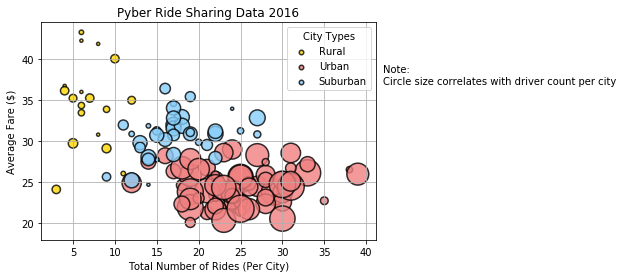

In [2]:
#Creating Dataframe for key variables

city_pyber_df = pyber_df.groupby("City")
ride_count = city_pyber_df["Ride ID"].count()
avg_fare = city_pyber_df["Fare"].mean()
avg_driver_count = city_pyber_df["Driver Count"].mean()
city_type = city_data.set_index("city")["type"]


ride_summ_df = pd.DataFrame({"Total Rides":ride_count,
                            "Average Fare":avg_fare,
                            "Total Drivers":avg_driver_count,
                            "City Type":city_type})

rural_df = ride_summ_df.loc[ride_summ_df["City Type"] == "Rural"]
urban_df = ride_summ_df.loc[ride_summ_df["City Type"] == "Urban"]
suburban_df = ride_summ_df.loc[ride_summ_df["City Type"] == "Suburban"]

#Creating scatterplot based on city type
plt.scatter(rural_df["Total Rides"], rural_df["Average Fare"], color = "gold", edgecolors = "black", s=rural_df["Total Drivers"]*10, alpha = 0.8, linewidth = 1.5)
plt.scatter(urban_df["Total Rides"], urban_df["Average Fare"], color = "lightcoral", edgecolors = "black", s = urban_df["Total Drivers"]*10, alpha = 0.8, linewidth = 1.5)
plt.scatter(suburban_df["Total Rides"], suburban_df["Average Fare"], color = "lightskyblue", edgecolors = "black", s = suburban_df["Total Drivers"]*10, alpha = 0.8, linewidth = 1.5)

#Label, grid lines, and legend
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data 2016")
plt.grid()

labels = ["Rural", "Urban", "Suburban"]
bubble_legend = plt.legend(labels, title = "City Types", loc = "best")
bubble_legend.legendHandles[0]._sizes = [20]
bubble_legend.legendHandles[1]._sizes = [20]
bubble_legend.legendHandles[2]._sizes = [20]

#Text note regarding the size of plot points
plt.text(42, 37, "Note: \nCircle size correlates with driver count per city")

#Saving Bubble Chart
plot_1_loc = os.path.join("data_plots", "Pyber_Bubble.png")
plt.savefig(plot_1_loc)

plt.show()


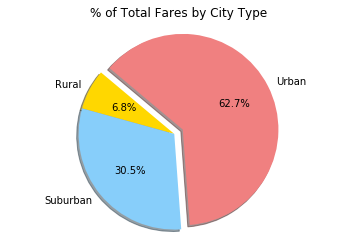

In [3]:
#Creating dataframe based on type, calculating total fare
city_type_pyber_df = pyber_df.groupby("Type")
total_fares_df = city_type_pyber_df["Fare"].sum()

#Creating pie chart
total_fare_pie_labels = ["Rural", "Suburban", "Urban"]
total_fare_pie_explode = (0, 0, 0.1)
total_fare_pie_colors = ["gold", "lightskyblue", "lightcoral"]

plt.pie(total_fares_df, explode = total_fare_pie_explode, labels = total_fare_pie_labels, colors = total_fare_pie_colors,
       autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.title("% of Total Fares by City Type")
plt.axis("equal")

#Saving pie chart
plot_2_loc = os.path.join("data_plots", "Total_Fares_by_City_Type.png")
plt.savefig(plot_2_loc)

plt.show()

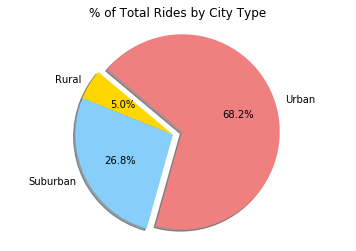

In [4]:
#Creating dataframe based on type, calculating total rides
city_type_pyber_df = pyber_df.groupby("Type")
total_rides_df = city_type_pyber_df["Ride ID"].sum()

#Building pie chart
total_rides_pie_labels = ["Rural", "Suburban", "Urban"]
total_rides_pie_explode = (0, 0, 0.1)
total_rides_pie_colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_rides_df, explode = total_rides_pie_explode, labels = total_rides_pie_labels, colors = total_rides_pie_colors,
       autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.title("% of Total Rides by City Type")
plt.axis("equal")

#Saving pie chart
plot_3_loc = os.path.join("data_plots", "Total_Rides_by_City_Type")
plt.savefig(plot_3_loc)

plt.show()

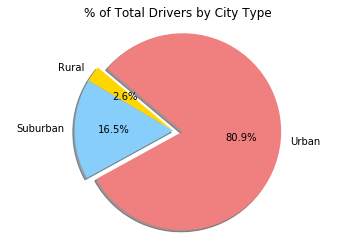

In [5]:
#Creating dataframe based on type, calculating total drivers
city_type_pyber_df = city_data.groupby("type")
total_drivers_df = city_type_pyber_df["driver_count"].sum()

#Building pie chart
total_drivers_pie_labels = ["Rural", "Suburban", "Urban"]
total_drivers_pie_explode = (0, 0, 0.1)
total_drivers_pie_colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(total_drivers_df, explode = total_drivers_pie_explode, labels = total_drivers_pie_labels, colors = total_drivers_pie_colors,
       autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

#Saving pie chart
plot_4_loc = os.path.join("data_plots", "Total_Drivers_by_City_Type")
plt.savefig(plot_4_loc)

plt.show()